<a href="https://colab.research.google.com/github/djvaroli/samsung_oct/blob/Janhavi-Colab-Notebooks/50per_train_data_JG_oct__2_model_SimCLR_DenseNet121_batch_size_update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/Samsung-OCT-Project-Work/')
pwd = os.getcwd()
print(pwd)

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/Samsung-OCT-Project-Work


# Load Dataframe

#JG: Start execution 

In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/simclr_tf_keras_07022021/oct_run/50per_train_data_densenet')

In [ ]:
!pip install keras==2.3.1
!pip install tensorflow==2.1.0
!pip install opencv-python==4.2.0.32
!pip install scikit-learn==0.23.1
!pip install scipy==1.4.1
!pip install DateTime==4.3

     |████████████████████████████████| 378kB 11.6MB/s 
     |████████████████████████████████| 51kB 6.8MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3
     |████████████████████████████████| 421.8MB 31kB/s 
     |████████████████████████████████| 3.9MB 29.2MB/s 
     |████████████████████████████████| 450kB 46.3MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7557 sha256=b7840be853edf46529e6bfaf71877e54d6573d42972c3ad1f8369e40da18d765
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.13.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Found existing installation: tensorboard 2.5.0
    Uninstalling tensorboard-2.5.0:
      Successfu

In [ ]:

%cd SimCLRv1-keras-tensorflow/
%pwd

/content/drive/My Drive/Colab Notebooks/simclr_tf_keras_07022021/oct_run/50per_train_data_densenet/SimCLRv1-keras-tensorflow


'/content/drive/My Drive/Colab Notebooks/simclr_tf_keras_07022021/oct_run/50per_train_data_densenet/SimCLRv1-keras-tensorflow'

In [ ]:
import numpy as np
import pickle
import pandas as pd
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.vgg16 import VGG16 
from tensorflow.keras.applications.densenet import DenseNet121 
from evaluate_features import get_features, linear_classifier, tSNE_vis

In [ ]:
!pip install 'h5py==2.10.0' --force-reinstall

     |████████████████████████████████| 2.9MB 12.7MB/s 
     |████████████████████████████████| 15.7MB 335kB/s 
ERROR: tensorflow-probability 0.13.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
ERROR: google-colab 1.0.0 has requirement six~=1.15.0, but you'll have six 1.16.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0


In [ ]:
train_data = pd.read_pickle('/content/drive/My Drive/Colab Notebooks/Samsung-OCT-Project-Work/processed_data/data/train_data_50per_resize/train_data_50per_df.pickle')
train_data.shape



(1669, 3)

In [ ]:
train_data.loc[train_data['class_label']=='3']

,filename,class_label,class_one_hot
1143,/content/drive/My Drive/Colab Notebooks/Samsun...,3,"[0, 0, 0, 1]"
1144,/content/drive/My Drive/Colab Notebooks/Samsun...,3,"[0, 0, 0, 1]"
1145,/content/drive/My Drive/Colab Notebooks/Samsun...,3,"[0, 0, 0, 1]"
1146,/content/drive/My Drive/Colab Notebooks/Samsun...,3,"[0, 0, 0, 1]"
1147,/content/drive/My Drive/Colab Notebooks/Samsun...,3,"[0, 0, 0, 1]"
...,...,...,...
1664,/content/drive/My Drive/Colab Notebooks/Samsun...,3,"[0, 0, 0, 1]"
1665,/content/drive/My Drive/Colab Notebooks/Samsun...,3,"[0, 0, 0, 1]"
1666,/content/drive/My Drive/Colab Notebooks/Samsun...,3,"[0, 0, 0, 1]"
1667,/content/drive/My Drive/Colab Notebooks/Samsun...,3,"[0, 0, 0, 1]"


In [ ]:
test_data = pd.read_pickle("/content/drive/My Drive/Colab Notebooks/Samsung-OCT-Project-Work/processed_data/data/test_resize/test_df.pickle")
test_data.loc[test_data['class_label']=='2']

,filename,class_label,class_one_hot
484,/content/drive/My Drive/Colab Notebooks/Samsun...,2,"[0, 0, 1, 0]"
485,/content/drive/My Drive/Colab Notebooks/Samsun...,2,"[0, 0, 1, 0]"
486,/content/drive/My Drive/Colab Notebooks/Samsun...,2,"[0, 0, 1, 0]"
487,/content/drive/My Drive/Colab Notebooks/Samsun...,2,"[0, 0, 1, 0]"
488,/content/drive/My Drive/Colab Notebooks/Samsun...,2,"[0, 0, 1, 0]"
...,...,...,...
721,/content/drive/My Drive/Colab Notebooks/Samsun...,2,"[0, 0, 1, 0]"
722,/content/drive/My Drive/Colab Notebooks/Samsun...,2,"[0, 0, 1, 0]"
723,/content/drive/My Drive/Colab Notebooks/Samsun...,2,"[0, 0, 1, 0]"
724,/content/drive/My Drive/Colab Notebooks/Samsun...,2,"[0, 0, 1, 0]"


In [ ]:
val_data = pd.read_pickle("/content/drive/My Drive/Colab Notebooks/Samsung-OCT-Project-Work/processed_data/data/val_resize/val_df.pickle")
val_data.loc[val_data['class_label']=='3']

,filename,class_label,class_one_hot
24,/content/drive/My Drive/Colab Notebooks/Samsun...,3,"[0, 0, 0, 1]"
25,/content/drive/My Drive/Colab Notebooks/Samsun...,3,"[0, 0, 0, 1]"
26,/content/drive/My Drive/Colab Notebooks/Samsun...,3,"[0, 0, 0, 1]"
27,/content/drive/My Drive/Colab Notebooks/Samsun...,3,"[0, 0, 0, 1]"
28,/content/drive/My Drive/Colab Notebooks/Samsun...,3,"[0, 0, 0, 1]"
29,/content/drive/My Drive/Colab Notebooks/Samsun...,3,"[0, 0, 0, 1]"
30,/content/drive/My Drive/Colab Notebooks/Samsun...,3,"[0, 0, 0, 1]"
31,/content/drive/My Drive/Colab Notebooks/Samsun...,3,"[0, 0, 0, 1]"


In [ ]:
class_labels = ["0", "1", "2", "3"]
num_classes = len(train_data['class_one_hot'][0])

print("# of training instances:", len(train_data.index), "\n")

for label in class_labels:
    print(f"# of '{label}' training instances: {(train_data.class_label == label).sum()}")
    

# of training instances: 1669 

# of '0' training instances: 744
# of '1' training instances: 227
# of '2' training instances: 172
# of '3' training instances: 526


In [ ]:
df_train = train_data
df_val = val_data
df_test = test_data
print(df_train.shape,df_test.shape,df_val.shape)

(1669, 3) (968, 3) (32, 3)


In [ ]:
#Testing with train data only 
# varying the % of train test split from 70-30 to 80-20

df_train, df_val_test = train_test_split(df_train, test_size=0.20, random_state=42, shuffle=True)
df_val, df_test = train_test_split(df_val_test, test_size=0.50, random_state=42, shuffle=True)

print("# of training instances:", len(df_train.index), "\n")
for label in class_labels:
    print(f"# of '{label}' training instances: {(df_train.class_label == label).sum()}")
    
print()
print("# of validation instances:", len(df_val.index), "\n")
for label in class_labels:
    print(f"# of '{label}' training instances: {(df_val.class_label == label).sum()}")

print()
print("# of test instances:", len(df_test.index), "\n")
for label in class_labels:
    print(f"# of '{label}' training instances: {(df_test.class_label == label).sum()}")
    
dfs = {
    "train": df_train,
    "val": df_val,
    "test": df_test
}

# of training instances: 1335 

# of '0' training instances: 583
# of '1' training instances: 188
# of '2' training instances: 138
# of '3' training instances: 426

# of validation instances: 167 

# of '0' training instances: 83
# of '1' training instances: 17
# of '2' training instances: 19
# of '3' training instances: 48

# of test instances: 167 

# of '0' training instances: 78
# of '1' training instances: 22
# of '2' training instances: 15
# of '3' training instances: 52


In [ ]:
# Img size
size = 80
height_img = size
width_img = size

input_shape = (height_img, width_img, 3)

# Load pretrained DenseNet121 & Feature evaluation

In [ ]:
params_dense_net = {'weights': "imagenet", 
                'include_top': False, 
                'input_shape': input_shape, 
                'pooling': None}

# Design model
base_model = DenseNet121(**params_dense_net)
base_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 80, 80, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 86, 86, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 40, 40, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 40, 40, 64)   256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [ ]:
feat_dim = 2 * 2* 1024 # 512 for vgg-16

In [ ]:
!pip install keras==2.3.1

In [ ]:
import tensorflow 
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.densenet import preprocess_input

In [ ]:
from tensorflow import keras
from DataGeneratorSimCLR import DataGeneratorSimCLR as DataGenerator

# Build SimCLR-Model

In [ ]:
#from DataGeneratorSimCLR import DataGeneratorSimCLR as DataGenerator
from SimCLR import SimCLR
#if it errors out, execute cell # 28 : pip install keras==2.3.1

### Properties

In [ ]:
batch_size = 16
# Projection_head
num_layers_ph = 2
feat_dims_ph = [2048, 128]
num_of_unfrozen_layers = 1 #Note: with 1, all weights of the base_model are still frozen (last layer is max_pool)
save_path = 'models/trashnet'

In [ ]:
SimCLR = SimCLR(
        base_model = base_model,
        input_shape = input_shape,
        batch_size = batch_size,
        feat_dim = feat_dim,
        feat_dims_ph = feat_dims_ph,
        num_of_unfrozen_layers = num_of_unfrozen_layers,
        save_path = save_path
    )

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 80, 80, 3)]  0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 80, 80, 3)]  0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 80, 80, 3)]  0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, 80, 80, 3)]  0                                            
______________________________________________________________________________________________

In [ ]:
print(SimCLR)

In [ ]:
params_generator = {'batch_size': batch_size,
                    'shuffle' : True,
                    'width':width_img,
                    'height': height_img,
                    'DenseNet121': True
                   }

# Generators
data_train = DataGenerator(df_train.reset_index(drop=True), **params_generator)
data_val = DataGenerator(df_val.reset_index(drop=True), subset = "val", **params_generator) #val keeps the unity values on the same random places ~42
data_test = DataGenerator(df_test.reset_index(drop=True), subset = "test", **params_generator) #test keeps the unity values on the diagonal

In [ ]:
data_train.height

80

In [ ]:
data_train.df

,filename,class_label,class_one_hot
0,/content/drive/My Drive/Colab Notebooks/Samsun...,2,"[0, 0, 1, 0]"
1,/content/drive/My Drive/Colab Notebooks/Samsun...,0,"[1, 0, 0, 0]"
2,/content/drive/My Drive/Colab Notebooks/Samsun...,0,"[1, 0, 0, 0]"
3,/content/drive/My Drive/Colab Notebooks/Samsun...,0,"[1, 0, 0, 0]"
4,/content/drive/My Drive/Colab Notebooks/Samsun...,1,"[0, 1, 0, 0]"
...,...,...,...
1330,/content/drive/My Drive/Colab Notebooks/Samsun...,2,"[0, 0, 1, 0]"
1331,/content/drive/My Drive/Colab Notebooks/Samsun...,3,"[0, 0, 0, 1]"
1332,/content/drive/My Drive/Colab Notebooks/Samsun...,1,"[0, 1, 0, 0]"
1333,/content/drive/My Drive/Colab Notebooks/Samsun...,3,"[0, 0, 0, 1]"


In [ ]:
y_predict_test_before = SimCLR.predict(data_test)

# SimCLR - Round 1: Only Projection head

## Training SimCLR

In [ ]:
SimCLR.train(data_train, data_val, epochs = 5)

Train for 84 steps, validate for 11 steps
Epoch 1/5
83/84 [============================>.] - ETA: 2s - loss: 565.7085
Epoch 00001: val_loss improved from inf to 441.86371, saving model to models/trashnet/SimCLR/SimCLR_07_08_00h_20.h5
84/84 [==============================] - 331s 4s/step - loss: 564.2658 - val_loss: 441.8637
Epoch 2/5
83/84 [============================>.] - ETA: 0s - loss: 343.1384
Epoch 00002: val_loss improved from 441.86371 to 250.44715, saving model to models/trashnet/SimCLR/SimCLR_07_08_00h_20.h5
84/84 [==============================] - 47s 555ms/step - loss: 342.0543 - val_loss: 250.4471
Epoch 3/5
83/84 [============================>.] - ETA: 0s - loss: 183.2711
Epoch 00003: val_loss improved from 250.44715 to 124.43300, saving model to models/trashnet/SimCLR/SimCLR_07_08_00h_20.h5
84/84 [==============================] - 46s 550ms/step - loss: 182.5838 - val_loss: 124.4330
Epoch 4/5
83/84 [============================>.] - ETA: 0s - loss: 90.2314
Epoch 00004: va

In [ ]:
y_predict_test_after = SimCLR.predict(data_test)

## SimCLR-output check

In [ ]:
print(f"Random guess accuracy: {round(1/(2*batch_size),4)}")

print(f"accuracy - test - before: {np.round(np.sum(data_test[0][1] * y_predict_test_before[:batch_size])/(2*batch_size),2)}")
print(f"accuracy - test - after: {np.round(np.sum(data_test[0][1] * y_predict_test_after[:batch_size])/(2*batch_size),2)}")

Random guess accuracy: 0.0312
accuracy - test - before: 0.24
accuracy - test - after: 0.67


In [ ]:
print("y_predict_test_before")
for i in range(min(batch_size, 15)):
    print(np.round(y_predict_test_before[i][i],2), end=" | ")
print("\n")    
print("y_predict_test_after")
for i in range(min(batch_size, 15)):
    print(np.round(y_predict_test_after[i][i],2), end=" | ")
print("\n") 
print("y_predict_test_after - Second diagonal")
for i in range(min(batch_size, 15)):
    print(np.round(y_predict_test_after[i + 2 * batch_size][i],2), end=" | ")
print("\n")    

y_predict_test_before
0.18 | 0.2 | 0.2 | 0.23 | 0.1 | 0.25 | 0.27 | 0.16 | 0.41 | 0.36 | 0.2 | 0.26 | 0.2 | 0.29 | 0.22 | 

y_predict_test_after
0.68 | 0.72 | 0.73 | 0.76 | 0.71 | 0.73 | 0.57 | 0.52 | 0.93 | 0.76 | 0.62 | 0.49 | 0.56 | 0.75 | 0.62 | 

y_predict_test_after - Second diagonal
0.83 | 0.84 | 0.56 | 0.71 | 0.83 | 0.8 | 0.67 | 0.75 | 0.49 | 0.69 | 0.89 | 0.76 | 0.64 | 0.66 | 0.79 | 



## Feature Evaluation

Note that this evaluation corresponds with the unaltered pretrained weights

In [ ]:
fractions = [1.0,1.0,1.0] # [1.0, 0.2, 0.05]
#with less images densenet121 is failing to predict, resulting in null values in classification report.

### Logistic regression evaluation

In [ ]:
features_train, y_train, feats = get_features(base_model, df_train, class_labels)
features_test, y_test, feats = get_features(base_model, df_test, class_labels)
np.count_nonzero(features_train[0])

1751

In [ ]:
# Training logistic regression classifier on 3 fractions of the data
# Optimal regularization is determined from a 5-fold cross-validation
from sklearn.metrics import classification_report, plot_confusion_matrix
for fraction in fractions:
    print(f"    ==== {fraction * 100}% of the training data used ==== \n")
    linear_classifier(features_train, y_train, features_test, y_test, class_labels, fraction =fraction)
  

    ==== 100.0% of the training data used ==== 

Accuracy on test: 0.68 

              precision    recall  f1-score   support

           0       0.79      0.78      0.79        78
           1       0.53      0.45      0.49        22
           2       0.25      0.13      0.17        15
           3       0.65      0.79      0.71        52

    accuracy                           0.68       167
   macro avg       0.55      0.54      0.54       167
weighted avg       0.66      0.68      0.67       167

    ==== 100.0% of the training data used ==== 

Accuracy on test: 0.68 

              precision    recall  f1-score   support

           0       0.79      0.78      0.79        78
           1       0.53      0.45      0.49        22
           2       0.25      0.13      0.17        15
           3       0.65      0.79      0.71        52

    accuracy                           0.68       167
   macro avg       0.55      0.54      0.54       167
weighted avg       0.66      0.68    

### Fine tuned model

In [ ]:
batch_size_classifier = 16
params_generator_classifier = {'max_width':width_img,
                            'max_height': height_img,
                            'num_classes': num_classes,
                            'DenseNet121': True
                            }
params_training_classifier = {'1.0':{
                                "reg_dense" : 0.005,
                                "reg_out" : 0.005,
                                "nums_of_unfrozen_layers" : [5, 5, 6, 7],
                                "lrs" : [1e-3, 1e-4, 5e-5, 5e-5],
                                "epochs" : [5, 5, 15, 10]
                                },
                              '0.2':{
                                "reg_dense" : 0.075,
                                "reg_out" : 0.01,
                                "nums_of_unfrozen_layers" : [5, 5, 6, 7],
                                "lrs" : [1e-3, 1e-4, 5e-5, 5e-5],
                                "epochs" : [5, 5, 20, 15]
                              },
                              '0.05':{
                                "reg_dense" : 0.01,
                                "reg_out" : 0.02,
                                "nums_of_unfrozen_layers" : [5, 5, 6, 7],
                                "lrs" : [1e-3, 1e-4, 5e-5, 1e-5],
                                "epochs" : [5, 5, 20, 15]
                              }                              
                            }

In [ ]:
for fraction in fractions:
    print(f"    ==== {fraction * 100}% of the training data used ==== \n")
    SimCLR.train_NL_and_evaluate(dfs = dfs,
                                batch_size = batch_size_classifier,
                                params_generator = params_generator_classifier,
                                fraction = fraction,
                                class_labels = class_labels,
                                reg_dense = params_training_classifier[str(fraction)]["reg_dense"],
                                reg_out = params_training_classifier[str(fraction)]["reg_out"],
                                nums_of_unfrozen_layers = params_training_classifier[str(fraction)]["nums_of_unfrozen_layers"],
                                lrs = params_training_classifier[str(fraction)]["lrs"],
                                epochs = params_training_classifier[str(fraction)]["epochs"],
                                verbose_epoch = 0,
                                verbose_cycle = 0
                                )

    ==== 100.0% of the training data used ==== 

Best result from attempt 2
              precision    recall  f1-score   support

           0       0.72      0.82      0.77        78
           1       0.86      0.27      0.41        22
           2       0.17      0.13      0.15        15
           3       0.63      0.71      0.67        52

    accuracy                           0.65       167
   macro avg       0.59      0.48      0.50       167
weighted avg       0.66      0.65      0.63       167

    ==== 100.0% of the training data used ==== 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best result from attempt 4
              precision    recall  f1-score   support

           0       0.64      0.88      0.74        78
           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00        15
           3       0.56      0.63      0.59        52

    accuracy                           0.61       167
   macro avg       0.30      0.38      0.33       167
weighted avg       0.47      0.61      0.53       167

    ==== 100.0% of the training data used ==== 

Best result from attempt 1
              precision    recall  f1-score   support

           0       0.75      0.38      0.51        78
           1       1.00      0.23      0.37        22
           2       0.15      0.40      0.22        15
           3       0.57      0.90      0.70        52

    accuracy                           0.53       167
   macro avg       0.62      0.48      0.45       167
weighted avg       0.67      0.53      0.52       167



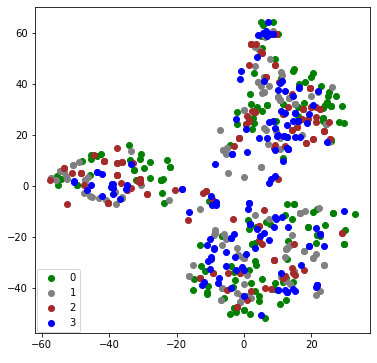

In [ ]:
tSNE_vis(df_train, features_train, class_labels)

# SimCLR - Round 2: Unfreeze last convolutional layer

## Training SimCLR

In [ ]:
#Unfreeze
SimCLR.unfreeze_and_train(data_train, data_val, num_of_unfrozen_layers = 2, r = 2, lr = 1e-5, epochs = 5)   

Model: "model_16"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_34 (InputLayer)           [(None, 80, 80, 3)]  0                                            
__________________________________________________________________________________________________
input_35 (InputLayer)           [(None, 80, 80, 3)]  0                                            
__________________________________________________________________________________________________
input_36 (InputLayer)           [(None, 80, 80, 3)]  0                                            
__________________________________________________________________________________________________
input_37 (InputLayer)           [(None, 80, 80, 3)]  0                                            
___________________________________________________________________________________________

## Feature Evaluation

### Logisitic regression

In [ ]:
base_model = SimCLR.base_model
fractions = [1.0, 0.2, 0.05]

In [ ]:
features_train, y_train, feats = get_features(base_model, df_train, class_labels)
features_test, y_test, feats = get_features(base_model, df_test, class_labels)
np.count_nonzero(features_train[0])

1785

In [ ]:
# Training logistic regression classifier on 3 fractions of the data
# Optimal regularization is determined from a 5-fold cross-validation
for fraction in fractions:
    print(f"    ==== {fraction * 100}% of the training data used ==== \n")
    linear_classifier(features_train, y_train, features_test, y_test, class_labels, fraction = fraction)

    ==== 100.0% of the training data used ==== 

Accuracy on test: 0.67 

              precision    recall  f1-score   support

           0       0.77      0.79      0.78        78
           1       0.47      0.41      0.44        22
           2       0.33      0.13      0.19        15
           3       0.64      0.75      0.69        52

    accuracy                           0.67       167
   macro avg       0.55      0.52      0.52       167
weighted avg       0.65      0.67      0.65       167

    ==== 20.0% of the training data used ==== 

Accuracy on test: 0.61 

              precision    recall  f1-score   support

           0       0.70      0.78      0.74        78
           1       0.29      0.09      0.14        22
           2       0.00      0.00      0.00        15
           3       0.54      0.75      0.63        52

    accuracy                           0.61       167
   macro avg       0.38      0.41      0.38       167
weighted avg       0.53      0.61     

### Fine tuned model

In [ ]:
batch_size_classifier = 16
params_generator_classifier = {'max_width':width_img,
                            'max_height': height_img,
                            'num_classes': num_classes,
                            'DenseNet121': True
                            }
params_training_classifier = {'1.0':{
                                "reg_dense" : 0.005,
                                "reg_out" : 0.005,
                                "nums_of_unfrozen_layers" : [5, 5, 6, 7],
                                "lrs" : [1e-3, 1e-4, 5e-5, 5e-5],
                                "epochs" : [5, 5, 15, 10]
                                },
                              '0.2':{
                                "reg_dense" : 0.075,
                                "reg_out" : 0.01,
                                "nums_of_unfrozen_layers" : [5, 5, 6, 7],
                                "lrs" : [1e-3, 1e-4, 5e-5, 5e-5],
                                "epochs" : [5, 5, 20, 15]
                              },
                              '0.05':{
                                "reg_dense" : 0.01,
                                "reg_out" : 0.02,
                                "nums_of_unfrozen_layers" : [5, 5, 6, 7],
                                "lrs" : [1e-3, 1e-4, 5e-5, 1e-5],
                                "epochs" : [5, 5, 20, 15]
                              }                              
                            }

In [ ]:
fractions = [1.0, 1.0, 1.0]
for fraction in fractions:    
  print(f"    ==== {fraction * 100}% of the training data used ==== \n")
  SimCLR.train_NL_and_evaluate(dfs = dfs,
                                batch_size = batch_size_classifier,
                                params_generator = params_generator_classifier,
                                fraction = fraction, 
                                class_labels = class_labels,
                                reg_dense = params_training_classifier[str(fraction)]["reg_dense"],
                                reg_out = params_training_classifier[str(fraction)]["reg_out"],
                                nums_of_unfrozen_layers = params_training_classifier[str(fraction)]["nums_of_unfrozen_layers"],
                                lrs = params_training_classifier[str(fraction)]["lrs"],
                                epochs = params_training_classifier[str(fraction)]["epochs"],
                                verbose_epoch = 0,
                                verbose_cycle = 0
                                )

    ==== 100.0% of the training data used ==== 

Learning diverged, stopped.


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Learning diverged, stopped.


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Run this one 
tSNE_vis(df_train, features_train, class_labels)
#tSNE_vis(df_test, features_test, class_labels)

ValueError: ignored

# SimCLR - Round 3: Unfreeze 2 last convolutional layer

## Training SimCLR

In [ ]:
#Unfreeze
SimCLR.unfreeze_and_train(data_train, data_val, num_of_unfrozen_layers = 3, r = 3, lr = 5e-6, epochs = 5)   

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_130 (InputLayer)          [(None, 80, 80, 3)]  0                                            
__________________________________________________________________________________________________
input_131 (InputLayer)          [(None, 80, 80, 3)]  0                                            
__________________________________________________________________________________________________
input_132 (InputLayer)          [(None, 80, 80, 3)]  0                                            
__________________________________________________________________________________________________
input_133 (InputLayer)          [(None, 80, 80, 3)]  0                                            
____________________________________________________________________________________________

In [ ]:
y_predict_test_after = SimCLR.predict(data_test)

## Feature Evaluation

In [ ]:
base_model = SimCLR.base_model

In [ ]:
features_train, y_train, feats = get_features(base_model, df_train, class_labels)
features_test, y_test, feats = get_features(base_model, df_test, class_labels)
np.count_nonzero(features_train[0])

1076

In [ ]:
# Training logistic regression classifier on 3 fractions of the data
# Optimal regularization is determined from a 5-fold cross-validation
fractions = [1.0, 0.2, 0.05]
for fraction in fractions:
    print(f"    ==== {fraction * 100}% of the training data used ==== \n")
    linear_classifier(features_train, y_train, features_test, y_test, class_labels, fraction = fraction)

    ==== 100.0% of the training data used ==== 

Accuracy on test: 0.8 

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       111
           1       0.72      0.61      0.66        38
           2       0.48      0.48      0.48        23
           3       0.84      0.81      0.83        79

    accuracy                           0.80       251
   macro avg       0.72      0.70      0.71       251
weighted avg       0.79      0.80      0.79       251

    ==== 20.0% of the training data used ==== 

Accuracy on test: 0.8 

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       111
           1       0.74      0.61      0.67        38
           2       0.59      0.43      0.50        23
           3       0.80      0.81      0.81        79

    accuracy                           0.80       251
   macro avg       0.74      0.70      0.72       251
weighted avg       0.79      0.80      0

### Fine tuned model

In [ ]:
batch_size_classifier = 32
params_generator_classifier = {'max_width':width_img,
                            'max_height': height_img,
                            'num_classes': num_classes,
                            'VGG': True
                        }

In [ ]:
for fraction in fractions:
    print(f"    ==== {fraction * 100}% of the training data used ==== \n")
    SimCLR.train_NL_and_evaluate(dfs = dfs,
                                batch_size = batch_size_classifier,
                                params_generator = params_generator_classifier,
                                fraction = fraction,
                                class_labels = class_labels,
                                reg_dense = 0.005,
                                reg_out = 0.003,
                                nums_of_unfrozen_layers = [5, 5, 6, 7],
                                lrs = [1e-3, 1e-4, 5e-5, 1e-5],
                                epochs = [5, 5, 15, 10],
                                verbose_epoch = 0,
                                verbose_cycle = 0
                                )

    ==== 100.0% of the training data used ==== 

Learning diverged, stopped.


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best result from attempt 1
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       111
           1       0.82      0.71      0.76        38
           2       0.71      0.43      0.54        23
           3       0.82      0.89      0.85        79

    accuracy                           0.84       251
   macro avg       0.81      0.74      0.77       251
weighted avg       0.84      0.84      0.84       251

    ==== 20.0% of the training data used ==== 

Learning diverged, stopped.


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

Best result from attempt 1
              precision    recall  f1-score   support

           0       0.44      1.00      0.61       111
           1       0.00      0.00      0.00        38
           2       0.00      0.00      0.00        23
           3       0.00      0.00      0.00        79

    accuracy                           0.44       251
   macro avg       0.11      0.25      0.15       251
weighted avg       0.20      0.44      0.27       251

    ==== 5.0% of the training data used ==== 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best result from attempt 2
              precision    recall  f1-score   support

           0       0.44      1.00      0.61       111
           1       0.00      0.00      0.00        38
           2       0.00      0.00      0.00        23
           3       0.00      0.00      0.00        79

    accuracy                           0.44       251
   macro avg       0.11      0.25      0.15       251
weighted avg       0.20      0.44      0.27       251



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


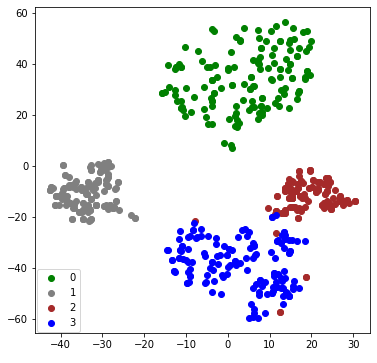

In [ ]:
tSNE_vis(df_train, features_train, class_labels)

# SimCLR - Round 4: Unfreeze 3 last convolutional layer

#JG: Achieved quite good classification as seen above. Step not needed ; it leads to NaN features.

In [ ]:
y_predict_test_before = y_predict_test_after

## Training SimCLR

In [ ]:
#Unfreeze
SimCLR.unfreeze_and_train(data_train, 
                          data_val, 
                          num_of_unfrozen_layers = 4, 
                          r = 4, 
                          lr = 1e-6, 
                          epochs = 5)  

Model: "model_49"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_259 (InputLayer)          [(None, 80, 80, 3)]  0                                            
__________________________________________________________________________________________________
input_260 (InputLayer)          [(None, 80, 80, 3)]  0                                            
__________________________________________________________________________________________________
input_261 (InputLayer)          [(None, 80, 80, 3)]  0                                            
__________________________________________________________________________________________________
input_262 (InputLayer)          [(None, 80, 80, 3)]  0                                            
___________________________________________________________________________________________

In [ ]:
y_predict_test_after = SimCLR.predict(data_test)

## Feature Evaluation

### Logistic Regression

In [ ]:
base_model = SimCLR.base_model

In [ ]:
features_train, y_train, feats = get_features(base_model, df_train, class_labels)
features_test, y_test, feats = get_features(base_model, df_test, class_labels)
np.count_nonzero(features_train[0])

/content/drive/My Drive/Colab Notebooks/simclr_tf_keras_07022021/oct_run/50per_train_data/SimCLRv1-keras-tensorflow/evaluate_features.py:52: RuntimeWarning: invalid value encountered in true_divide
  feat_norm = feat_un_norm / np.max(np.abs(feat_un_norm), axis=0)


2048

In [ ]:
features_train_nzero = (features_train[np.nonzero(features_train)]).reshape([1168,2048])
features_test_nzero = features_test[np.nonzero(features_test)]
y_train_nzero = y_train[np.nonzero(y_train)]
y_test_nzero = y_test[np.nonzero(y_test)]
print(y_train_nzero.shape, y_train.shape, y_test_nzero.shape, y_test.shape, '\n')
print(features_train.shape)
print(features_test.shape)
print(features_test_nzero.shape)
print(features_train_nzero.shape)

(647,) (1168,) (140,) (251,) 

(1168, 2048)
(251, 2048)
(514048,)
(1168, 2048)


In [ ]:
# Training logistic regression classifier on 3 fractions of the data
# Optimal regularization is determined from a 5-fold cross-validation
fractions = [1.0, 0.2, 0.05]
for fraction in fractions:
    print(f"    ==== {fraction * 100}% of the training data used ==== \n")
    linear_classifier(features_train, y_train, features_test, y_test, class_labels, fraction = fraction)

    ==== 100.0% of the training data used ==== 



ValueError: ignored

In [ ]:
# Training logistic regression classifier on 3 fractions of the data
# Optimal regularization is determined from a 5-fold cross-validation
fractions = [1.0, 0.2, 0.05]
for fraction in fractions:
    print(f"    ==== {fraction * 100}% of the training data used ==== \n")
    linear_classifier(features_train, y_train_nzero, features_test, y_test_nzero, class_labels, fraction = fraction)



    ==== 100.0% of the training data used ==== 



ValueError: ignored

### Fine tuned model

In [ ]:
batch_size_classifier = 32
params_generator_classifier = {'max_width':width_img,
                            'max_height': height_img,
                            'num_classes': num_classes,
                            'VGG': True
                            }
params_training_classifier = {'1.0':{
                                "reg_dense" : 0.005,
                                "reg_out" : 0.005,
                                "nums_of_unfrozen_layers" : [5, 5, 6, 7],
                                "lrs" : [1e-3, 1e-4, 5e-5, 5e-5],
                                "epochs" : [5, 5, 15, 10]
                                },
                              '0.2':{
                                "reg_dense" : 0.075,
                                "reg_out" : 0.01,
                                "nums_of_unfrozen_layers" : [5, 5, 6, 7],
                                "lrs" : [1e-3, 1e-4, 5e-5, 5e-5],
                                "epochs" : [5, 5, 20, 15]
                              },
                              '0.05':{
                                "reg_dense" : 0.01,
                                "reg_out" : 0.02,
                                "nums_of_unfrozen_layers" : [5, 5, 6, 7],
                                "lrs" : [1e-3, 1e-4, 5e-5, 1e-5],
                                "epochs" : [5, 5, 20, 15]
                              }                              
                            }

In [ ]:
for fraction in fractions:    
    print(f"    ==== {fraction * 100}% of the training data used ==== \n")
    SimCLR.train_NL_and_evaluate(dfs = dfs,
                                batch_size = batch_size_classifier,
                                params_generator = params_generator_classifier,
                                fraction = fraction,
                                class_labels = class_labels,
                                reg_dense = params_training_classifier[str(fraction)]["reg_dense"],
                                reg_out = params_training_classifier[str(fraction)]["reg_out"],
                                nums_of_unfrozen_layers = params_training_classifier[str(fraction)]["nums_of_unfrozen_layers"],
                                lrs = params_training_classifier[str(fraction)]["lrs"],
                                epochs = params_training_classifier[str(fraction)]["epochs"],
                                verbose_epoch = 0,
                                verbose_cycle = 0
                                )

    ==== 100.0% of the training data used ==== 



KeyboardInterrupt: ignored

In [ ]:
tSNE_vis(df_train, features_train, class_labels)

In [ ]:
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/simclr_tf_keras_07022021/oct_run/50per_train_data/SimCLRv1-keras-tensorflow'

# JG: Load pre-trained best performaing SimCLR based model trained with 1168 images only and make predictions

In [ ]:
import tensorflow as tf
import json
import os
from tensorflow import keras
from tensorflow.keras.models import load_model

In [ ]:
os.chdir('/content/drive/My Drive/Colab Notebooks/simclr_tf_keras_07022021/oct_run/50per_train_data/SimCLRv1-keras-tensorflow/models/trashnet/SimCLR')
%ls

SimCLR_07_04_02h_07.h5  SimCLR_07_04_22h_15.h5  SimCLR_07_04_23h_08.h5
SimCLR_07_04_21h_28.h5  SimCLR_07_04_22h_42.h5


In [ ]:
!pip install 'h5py==2.10.0' --force-reinstall

     |████████████████████████████████| 2.9MB 4.3MB/s 
     |████████████████████████████████| 15.7MB 332kB/s 
ERROR: tensorflow 2.5.0 has requirement h5py~=3.1.0, but you'll have h5py 2.10.0 which is incompatible.
ERROR: tensorflow 2.5.0 has requirement numpy~=1.19.2, but you'll have numpy 1.21.0 which is incompatible.
ERROR: tensorflow 2.5.0 has requirement six~=1.15.0, but you'll have six 1.16.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement six~=1.15.0, but you'll have six 1.16.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Found ex

In [ ]:
os.chdir('/content/drive/My Drive/Colab Notebooks/simclr_tf_keras_07022021/oct_run/50per_train_data/SimCLRv1-keras-tensorflow')

In [ ]:
!pip install keras==2.3.1

In [ ]:
from SimCLR import SimCLR

In [ ]:
#model = load_model('/content/drive/My Drive/Colab Notebooks/simclr_tf_keras_07022021/oct_run/50per_train_data/SimCLRv1-keras-tensorflow/models/trashnet/SimCLR/SimCLR_07_04_22h_42.h5')
model = load_model('/content/drive/My Drive/Colab Notebooks/simclr_tf_keras_07022021/oct_run/50per_train_data/SimCLRv1-keras-tensorflow/models/trashnet/base_model/base_model_round_3.h5')
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_66 (InputLayer)        [(None, 80, 80, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 80, 80, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 80, 80, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 40, 40, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 40, 40, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 40, 40, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 20, 20, 128)       0     

In [ ]:
for layer in model.layers:
  print(layer)
print(len(model.layers))

19


In [ ]:
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/simclr_tf_keras_07022021/oct_run/50per_train_data/SimCLRv1-keras-tensorflow'

In [ ]:
os.chdir('/content/drive/My Drive/Colab Notebooks/simclr_tf_keras_07022021/oct_run/50per_train_data/SimCLRv1-keras-tensorflow/')

In [ ]:
from swish import Swish
from SoftmaxCosineSim import SoftmaxCosineSim

In [ ]:
model2 = load_model('/content/drive/My Drive/Colab Notebooks/simclr_tf_keras_07022021/oct_run/50per_train_data/SimCLRv1-keras-tensorflow/models/trashnet/SimCLR/SimCLR_07_04_22h_42.h5', custom_objects={'SoftmaxCosineSim':SoftmaxCosineSim,'Swish':Swish})


In [ ]:
import tensorflow 
from tensorflow import keras

In [ ]:
for layer in model2.layers:
  print(layer)

print(len(model2.layers))

69


In [ ]:
tensorflow.keras.utils.plot_model(model2,rankdir='LR', show_layer_names=True, show_shapes=True)